# Pendahuluan

Pada kali ini kita akan melakukan analisis dan prediksi pada data yang sudah disediakan. Terdapat data latih yang terdiri dari 770 folder, dimana setiap folder terdiri dari 3 file gambar. Setiap folder mengandung 1 foto orang yang akan dijadikan anchor. File gambar tersebut dapat berisikan foto pribadi, foto bersama, dan barang yang dimiliki oleh orang yang dijadikan anchor tersebut. Informasi jenis kelamin dan usia dari data latih tersedia pada file bernama train.csv.

Selain data latih, juga terdapat data tes yang berisikan 990 file gambar. **Kita diminta untuk memprediksi usia dari setiap file gambar pada data tes tersebut.** kemudian menguploadnya pada web satria data dengan mengikuti format yang ada pada file submission.csv.

Berikut adalah link dari folder dan file yang akan dipakai pada analisis kali ini:


*   Folder training (https://drive.google.com/drive/folders/1eEVRizmsqV_f7pWOCAvNrTegMCEiabXr?usp=sharing)
*   Folder testing (https://drive.google.com/drive/folders/1eEVRizmsqV_f7pWOCAvNrTegMCEiabXr?usp=sharing)
*   File train.csv (https://drive.google.com/drive/folders/1eEVRizmsqV_f7pWOCAvNrTegMCEiabXr?usp=sharing)
*   File submission.csv (https://drive.google.com/drive/folders/1eEVRizmsqV_f7pWOCAvNrTegMCEiabXr?usp=sharing)





Berikut adalah alur dari analisis yang akan dilakukan :
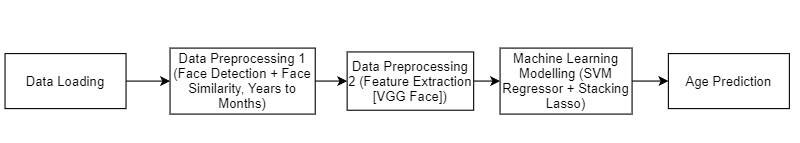



## Import Library yang Dibutuhkan

In [ ]:
# #Mounting
# from google.colab import drive
# drive.mount('/content/drive')


#Data Manipulating, Algebra, Visualizating
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import math
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Image Processing
!pip install mtcnn
!pip install deepface
from deepface import DeepFace
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
import cv2 
from PIL import Image

#System
import os
import csv
from numpy import load
import glob
import zipfile
from io import BytesIO
import base64
from random import randint
from IPython.display import SVG
from IPython.core.display import display, HTML
from numpy import loadtxt
import shutil
import joblib


#DeepLearning
import keras
import tensorflow as tf

from keras import optimizers
import tensorflow.keras.optimizers as Optimizer
from keras.models import Sequential, Model
import tensorflow.keras.models as Models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization, Input, GlobalAveragePooling2D

from keras import backend as K
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

#Preprocessing, Machine Learning, Report, etc
from imblearn.combine import SMOTETomek

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#Others
!pip install gdown
from tqdm import tqdm #ProgressBar
!pip install ipython-autotime #Time Execution
%load_ext autotime

     |████████████████████████████████| 2.3 MB 31.7 MB/s 
     |████████████████████████████████| 61 kB 7.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14273 sha256=6c01ed98900119f6d5a4898d00e3b3b46e356e7fc6204fe6425f0e65a0c8d1ea
  Stored in directory: /root/.cache/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4
Directory  /root /.deepface created
Directory  /root /.deepface/weights created
time: 826 µs (started: 2021-11-04 10:19:19 +00:00)


**Perhatian!!!**

**_Terdapat beberapa cell yang apabila dijalankan memerlukan waktu yang cukup lama (Seperti saat praproses, hyperparameter tuning, atau modelling). Jika ingin melewati cell tersebut, download file yang merupakan output dari cell tersebut dengan menjalankan cell yang diawali dengan !wget)_**



# 1. Data Loading

In [ ]:
#Download file/folder yang diperlukan untuk analisis 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=12b_efQnf5h1UluLYeCQt7xULJDY5pNz4' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=12b_efQnf5h1UluLYeCQt7xULJDY5pNz4" -O DatasetBDC2021.zip && rm -rf /tmp/cookies.txt

--2021-11-04 10:19:40--  https://docs.google.com/uc?export=download&confirm=8YZD&id=12b_efQnf5h1UluLYeCQt7xULJDY5pNz4
Resolving docs.google.com (docs.google.com)... 142.250.188.206, 2607:f8b0:4004:811::200e
Connecting to docs.google.com (docs.google.com)|142.250.188.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-68-docs.googleusercontent.com/docs/securesc/urk1r9g2gbctavcba928l9jsk85eaf4s/0l86ncornnn9iubc7n7o2qd1vubqi5st/1636021125000/17539190491766931577/06890054444236784317Z/12b_efQnf5h1UluLYeCQt7xULJDY5pNz4?e=download [following]
--2021-11-04 10:19:40--  https://doc-14-68-docs.googleusercontent.com/docs/securesc/urk1r9g2gbctavcba928l9jsk85eaf4s/0l86ncornnn9iubc7n7o2qd1vubqi5st/1636021125000/17539190491766931577/06890054444236784317Z/12b_efQnf5h1UluLYeCQt7xULJDY5pNz4?e=download
Resolving doc-14-68-docs.googleusercontent.com (doc-14-68-docs.googleusercontent.com)... 142.251.45.1, 2607:f8b0:4004:83e::2001
Connecting to doc-1

In [ ]:
#Unzip file tersebut
import zipfile

#Lokasi file zip
file_path = '/content/DatasetBDC2021.zip'

#Membaca file Zip
unzip = zipfile.ZipFile(file_path, 'r')
unzip.extractall('/content')
unzip.close()

time: 2.9 s (started: 2021-11-04 10:19:54 +00:00)


Folder yang dibutuhkan sudah berada pada cloud host dan siap untuk melakukan analisis

## train.csv

In [ ]:
#Baca File train as DataFrame
train = pd.read_csv("train.csv")

time: 10.5 ms (started: 2021-11-04 10:19:59 +00:00)


In [ ]:
#Melihat sebagian baris dari train.csv
train.head(5)

,nomor,jenis kelamin,usia
0,1,0,27
1,2,1,24
2,3,0,29
3,4,1,23
4,5,0,20


time: 18.9 ms (started: 2021-11-04 10:20:01 +00:00)


In [ ]:
#Melihat sebaran jenis kelamin
train['jenis kelamin'].value_counts()

0    447
1    323
Name: jenis kelamin, dtype: int64

time: 9.57 ms (started: 2021-11-04 04:22:47 +00:00)


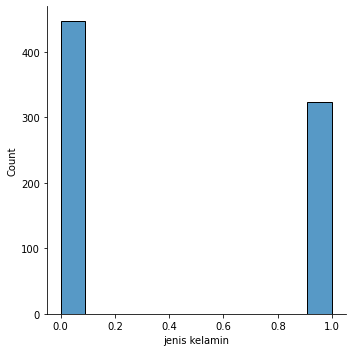

time: 368 ms (started: 2021-11-04 04:24:38 +00:00)


In [ ]:
#Melihat sebaran jenis kelamin
sns.displot(train["jenis kelamin"])

In [ ]:
#Melihat statistik deskriptif dari usia pada train.csv
train['usia'].describe()

count    770.000000
mean      26.098701
std        5.294266
min        5.000000
25%       23.000000
50%       26.000000
75%       28.000000
max       50.000000
Name: usia, dtype: float64

time: 14 ms (started: 2021-11-04 04:10:51 +00:00)


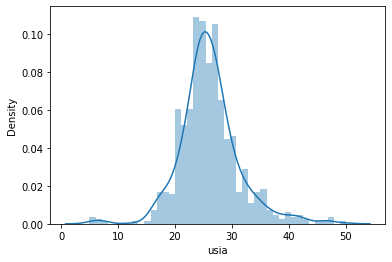

time: 460 ms (started: 2021-11-04 04:12:01 +00:00)


In [ ]:
#Melihat sebaran dari usia(tahun) pada train.csv
sns.distplot(train.usia)

Target variabel yaitu usia apabila terlihat dari sebarannya terdistribusi normal, rata-rata usia pada train.csv adalah 26.098 tahun, usia minimal 5 tahun dan usia maksimal adalah 50 tahun.

## submission.csv

In [ ]:
submission = pd.read_csv("submission.csv")

time: 5.48 ms (started: 2021-11-04 10:20:07 +00:00)


In [ ]:
submission.head(5)

,id
0,005093b2-8c4b-4ed7-91c3-f5f4d50f8d27
1,0052554e-069e-4c43-beb0-0885e8f7684e
2,0092b954-1143-4a95-a17b-1edfa6af3b01
3,009fc28b-fe9b-441d-b8a2-ea8b7ae6ca16
4,00d0e306-06fe-45d8-ae6c-6f83ab8f7810


time: 14.5 ms (started: 2021-11-04 04:19:30 +00:00)


Pada submission.csv terdapat kolom id dimana kolom tersebut merupakan nama file yang berada pada folder Testing, kita diminta untuk membuat 1 kolom lagi yaitu "usia" yang berisi hasil prediksi yang kita lakukan

# 2. Data Preprocessing

In [ ]:
def euclidean_distance(a, b):
	x1 = a[0]; y1 = a[1]
	x2 = b[0]; y2 = b[1]
	
	return math.sqrt(((x2 - x1) * (x2 - x1)) + ((y2 - y1) * (y2 - y1)))

time: 3.68 ms (started: 2021-11-04 04:20:44 +00:00)


In [ ]:
def distance(imgpath1,imgpath2):
  verification = DeepFace.verify(img1_path = imgpath1, img2_path = imgpath2,detector_backend = 'mtcnn')
  d=verification.get("distance")
  return d

time: 7.56 ms (started: 2021-11-04 04:20:47 +00:00)


In [ ]:
def alignment_procedure(img, left_eye, right_eye):
#this function aligns given face in img based on left and right eye coordinates
 
  left_eye_x, left_eye_y = left_eye
  right_eye_x, right_eye_y = right_eye
  
  #-----------------------
  #find rotation direction
  
  if left_eye_y > right_eye_y:
      point_3rd = (right_eye_x, left_eye_y)
      direction = -1 #rotate same direction to clock
  else:
      point_3rd = (left_eye_x, right_eye_y)
      direction = 1 #rotate inverse direction of clock
  
  #-----------------------
  #find length of triangle edges
  
  a = euclidean_distance(np.array(left_eye), np.array(point_3rd))
  b = euclidean_distance(np.array(right_eye), np.array(point_3rd))
  c = euclidean_distance(np.array(right_eye), np.array(left_eye))
  
  #-----------------------
  
  #apply cosine rule
  
  if b != 0 and c != 0: #this multiplication causes division by zero in cos_a calculation
  
      cos_a = (b*b + c*c - a*a)/(2*b*c)
      angle = np.arccos(cos_a) #angle in radian
      angle = (angle * 180) / math.pi #radian to degree
  
      #-----------------------
      #rotate base image
  
      if direction == -1:
          angle = 90 - angle
  
      img = Image.fromarray(img)
      img = np.array(img.rotate(direction * angle))
  
  #-----------------------
  
  return img #return img anyway

time: 30.7 ms (started: 2021-11-04 04:20:48 +00:00)


## 2.1. Data latih

Untuk menghemat waktu, pada tahap ini, kita akan melanjutkan tahap preproses pada babak penyisihan, kecuali augmentasi gambar. Dilanjutkan setelah pembagian folder 0 untuk perempuan dan 1 untuk laki-laki.

Berikut adalah alur dari data preprocessing yang akan dilakukan pada data latih:

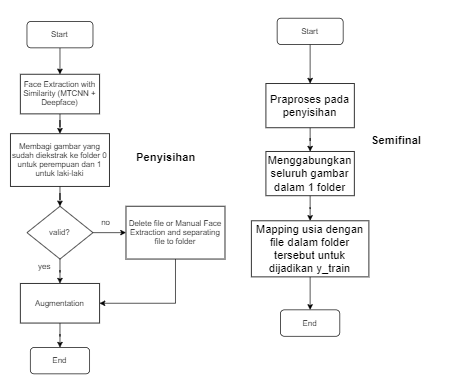

Pada setiap folder kita melakuakn ekstraksi wajah menggunakan **deketor wajah MTCNN** apabila tidak terdeteksi wajah, kita akan menghapus file tersebut, apabila terdeteksi 2 wajah atau lebih, kita menghitung kemiripan atau similaritynya menggunakan **library deepface** dengan threshold distance tertentu (kami menggunakan threshold distance<0.22) untuk menyatakan sebuah wajah mirip atau tidak. Jika mirip maka wajah akan diekstrak dan disimpan sebagai file .jpg. Untuk lebih jelasnya silahkan lihat ilustrasi dibawah (menggunakan contoh folder 23 (*hanya ilustrasi*)) :

<Figure size 432x288 with 0 Axes>

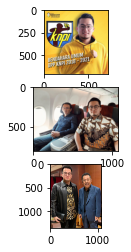

time: 794 ms (started: 2021-10-31 08:05:03 +00:00)


In [ ]:
img_23=[]
for i in range(3):
  i=i+1
  img=plt.imread("/content/Training/23/23_"+str(i)+".jpg")
  img_23.append(img)

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(3,1) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(img_23[0])
axarr[1].imshow(img_23[1])
axarr[2].imshow(img_23[2])


Setelah diekstraksi wajahnya, kita mendapat:

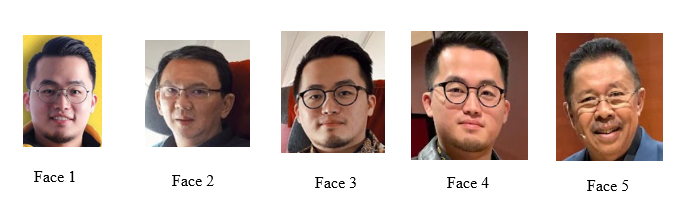

Setelah dibandingkan distancenya maka akan menghasilkan "tabel" sebagai berikut :

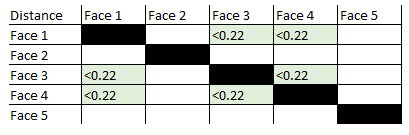


Dengan demikian, kita mengambil face 1, face 3 dan face 4 untuk data latih yang sudah diproses. Kodenya adalah sebagai berikut :

*Untuk menjalankan kode, silahkan select all (ctrl + a) pada semua kode kemudian klik ctrl+"/" dan jalankan kode*

*folder dan file sudah disesuaikan kode ini dapat dijalankan*

In [ ]:
root_train = '/content/Training/'
file_delete_train =[]
for i in tqdm(range(train.shape[0])):
  i=i+1
  try:
    os.mkdir("/content/preproses1/")
  except:
    q=1
  dirname = "/content/preproses1/"+str(i)
  try:
    os.mkdir(dirname)
  except:
    q=1
  faces_loc=[]
  y=0
  jj=[]
  for j in range(1,4):
    file_loc = root_train+str(train['nomor'][i-1])+'/'+str(train['nomor'][i-1])+'_'+str(j)+'.jpg'
    file_name = str(i)+"_"+str(j)+".jpg"
    img = cv2.imread(file_loc)
    faces = detector.detect_faces(img)
    sum_face = len(faces)
    if sum_face == 0:
      file_delete_train.append(file_name)
    elif sum_face == 1: #Diasumsikan ini foto pribadi
      A=faces[0].get('box');
      x,y,w,h = A
      crop_img = img[y:y+h, x:x+w]
      cv2.imwrite(os.path.join(dirname, file_name), np.array(crop_img))
    else:
      y=y+1
      jj.append(j)
      for f in range(sum_face):

        A=faces[f].get('box');
        x,y,w,h = A
        crop_img = img[y:y+h, x:x+w]
        temp_loc=str(j)+"_"+str(f)+".jpg"
        cv2.imwrite(temp_loc,np.array(crop_img))
        faces_loc.append(temp_loc)
  if y == 1 : #only one image detected face
      try:
        file_name = str(i)+"_"+str(jj[0])+".jpg"
        file_loc = root_train+str(train['nomor'][i-1])+'/'+str(train['nomor'][i-1])+'_'+str(jj[0])+'.jpg'
      except:
        n=0
      file_delete_train.append(file_name)
  elif y > 1:
    idx_dis_i = []
    dis = []
    idx_sim_error=[]
    for a in range(len(faces_loc)):
      for b in range (len(faces_loc)):
        if a != b :
          try:
            d=distance(faces_loc[a], faces_loc[b])
            dis.append(d)
            idx_dis_i.append(a)
          except ValueError:
            idx_sim_error.append(a)
    df = pd.DataFrame(list(zip(idx_dis_i, dis)),
               columns =['idx', 'distance'])
    df=df.sort_values('distance')
    df=df[df['distance'] <= 0.22] 
    idx_sim = df["idx"].tolist()
    idx_sim = list(set(idx_sim))
    if len(idx_sim) == 0:
      if y == 2:
        for c in jj:
          file_name = str(i)+"_"+str(c)+".jpg"
          file_loc = root_train+str(train['nomor'][i-1])+'/'+str(train['nomor'][i-1])+'_'+str(c)+'.jpg'
          file_delete_train.append(file_name)
    elif len(idx_sim) >= 1 :
      g=1
      for u in idx_sim:
        img = cv2.imread(faces_loc[u])
        file_name = str(i)+"_"+str(g)+".jpg"
        cv2.imwrite(os.path.join(dirname, file_name), np.array(img))
        g=g+1
  delete = pd.DataFrame({
      "id": file_delete_train,
      })
  delete.to_csv("/content/preproses1/delete.csv", index=False)

Karena pada proses analisis kemarin menggunakan google drive maka hasil running dari kode ini berada pada google drive. Berikut adalah link foldernya :
https://drive.google.com/drive/folders/1IIH6A2hKzFQp5D1hOfKqfFUrDjbzghAI?usp=sharing

Terdapat file delete.csv yang berisikan nama file yang dihapus karena wajahnya tidak terdeteksi atau tidak memenuhi kriteria (distance < 0.22). Selanjutnya kita akan memindahkan data ke temp file :

In [ ]:
#Move to temp file
import shutil
count=0
for i in tqdm(range(train.shape[0])):
  i=i+1
  list = os.listdir('/content/preproses1/'+str(i)) # dir is your directory path
  for j in list:
    file_loc = '/content/preproses1/'+str(train['nomor'][i-1])+'/'+j
    try:
      os.mkdir("/content/train_temp/")
    except:
      q=1
    shutil.copy(file_loc,'/content/train_temp/'+j)

Karena pada proses analisis kemarin menggunakan google drive maka hasil running dari kode ini berada pada google drive. Berikut adalah link foldernya :
https://drive.google.com/drive/folders/1km4DhxhDL4SDjpe0ujBQiXmJmY8AkXom?usp=sharing

Selanjutnya kita akan melakukan mapping antara file-file tersebut sesuai dengan jenis kelamin pada train.csv, setelah itu kita akan membaginya menjadi folder 0 untuk perempuan dan 1 untuk laki-laki. Berikut adalah kodenya :

In [ ]:
#Name depan setiap file di train_temp

path='/content/train_temp/'
nomor = []
list = os.listdir(path)
for i in list:
  part = i.partition('_')
  nomor.append(part[0])

In [ ]:
gender_map = dict(zip(train['nomor'], train['jenis kelamin']))
age_map = dict(zip(train['nomor'], train['usia']))

In [ ]:
temp = pd.DataFrame(np.array(nomor),columns =["idx"])
#mapping
temp['jenis kelamin'] = temp['idx'].astype(int).map(gender_map)
temp['usia'] = temp['idx'].astype(int).map(age_map)
temp.to_csv("/content/mapping_temp.csv", index=False)

mapping_temp.csv (https://drive.google.com/file/d/1HUPa8jfven2uaj0dUDsJQQkwyN_rWxcO/view?usp=sharing)

In [ ]:
#Memisahkan file 0 untuk perempuan dan 1 untuk laki-laki
try:
  os.mkdir("/content/train_face_extract/")
except:
  q=1
try:
  os.mkdir("/content/train_face_extract/0/")
except:
  q=1
try:
  os.mkdir("/content/train_face_extract/1/")
except:
  q=1
path = '/content/train_face_extract/'
list = os.listdir(path) # dir is your directory path
for i in tqdm(range(len(list))):
  for j in range(train.shape[0]):
    nomor = train["nomor"][j]
    part = list[i].partition('_')
    if part[0] == str(nomor):
      gender = train['jenis kelamin'][nomor-1]
      #print(gender)
      if gender == 1:
        shutil.copy(path+l, '/content/train_face_extract/1/')
      elif gender == 0:
        shutil.copy(path+l, '/content/train_face_extract/0/')

Setelah itu kita melakukan checking ulang secara manual kepada 2 folder tersebut, berikut adalah hal-hal yang didapatkan :


*   Salah mendeteksi wajah
*   Terdapat 2 wajah berbeda atau lebih yang diekstrak
*   Folder yang membingungkan
*   Kesalahan labeling oleh panitia


### Salah mendeteksi wajah

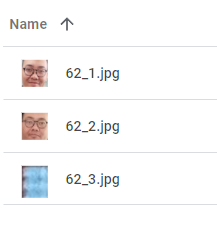


Contohnya adalah gambar dengan nama file 62_3.jpg solusinya adalah melakukan cropping manual pada data tersebut :
*   Gambar asli

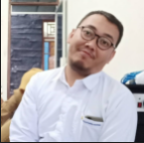


*   Gambar hasil ekstrasi dari MTCNN

62_3.jpg

*   Gambar setelah dilakukan cropping manual

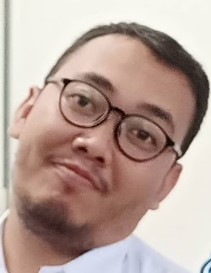

### Terdapat 2 wajah berbeda atau lebih yang diekstrak

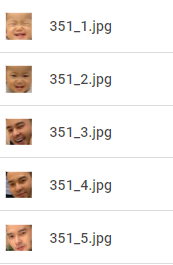

Hal ini disebabkan karena kita hanya menghitung distance, apabila distance < 0.22, maka wajah diekstrak. Pada kasus folder nomor 351 terdapat 2 wajah berbeda yang diekstrak karena algoritma menemukan 2 wajah sebagai anchor face. Solusinya adalah menghapus wajah yang tidak relevan. (Pada folder 351 ini kita akan mennghapus file 351_1.jpg dan 351_2.jpg)

### Folder yang membingungkan

Pada folder bernomor 552, terdapat hal yang membingungkan karena terdapat 2 anchor face.

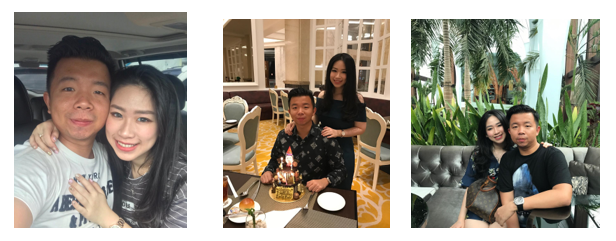

Algoritma akan mengekstrak 6 wajah dari folder tersebut

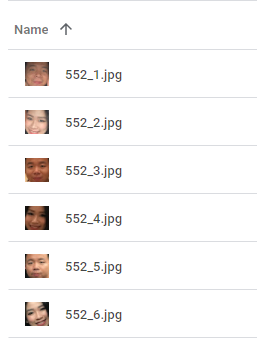

Solusinya adalah melihat train.csv dan melihat jenis kelamin dari folder bernomor 552, setelah itu didapati bahwa jenis kelamin untuk folder tersebut adalah perempuan, maka dari itu kita menghapus gambar laki-laki (552_2, 552_4, 552_6)

### Kesalahan labeling oleh panitia

Kami menemukan pada folder 118, 642, 723. Panitia melakukan kesalahan labeling. Contohnya adalah untuk folder 118, seharusnya jenis kelaminnya adalah laki-laki, namun pada train.csv tertulis bahwa jenis kelaminnya perempuan.

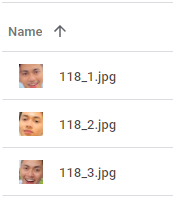

image.png


Solusinya adalah memindahkan gambar tersebut berdasarkan jenis kelamin yang sesuai, karena jika tidak dipindahkan akan sangat berpengaruh pada model.

Setelah semuanya sesuai, kami menyimpannya pada folder bernama Train_Fix_gender (https://drive.google.com/drive/folders/1xRk0PRpOAHPPJqEIXou_8-Uy9eHtIxIS?usp=sharing)

In [ ]:
#Hasil Akhir
#Tahap 1 praproses data pada data latih

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_3kELQhIL6n1IlWYlUpVO1i5Wy1skIhi' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1_3kELQhIL6n1IlWYlUpVO1i5Wy1skIhi" -O Train_Cleaned.zip && rm -rf /tmp/cookies.txt

--2021-11-04 10:33:43--  https://docs.google.com/uc?export=download&confirm=LReW&id=1_3kELQhIL6n1IlWYlUpVO1i5Wy1skIhi
Resolving docs.google.com (docs.google.com)... 172.217.15.110, 2607:f8b0:4004:811::200e
Connecting to docs.google.com (docs.google.com)|172.217.15.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-88-docs.googleusercontent.com/docs/securesc/3l9lieri3g8dt7t74duf9fcmp2kma24d/mb6g4p76r9923f4ord3ejjcebg640hej/1636021950000/17539190491766931577/07417144114839959577Z/1_3kELQhIL6n1IlWYlUpVO1i5Wy1skIhi?e=download [following]
--2021-11-04 10:33:44--  https://doc-14-88-docs.googleusercontent.com/docs/securesc/3l9lieri3g8dt7t74duf9fcmp2kma24d/mb6g4p76r9923f4ord3ejjcebg640hej/1636021950000/17539190491766931577/07417144114839959577Z/1_3kELQhIL6n1IlWYlUpVO1i5Wy1skIhi?e=download
Resolving doc-14-88-docs.googleusercontent.com (doc-14-88-docs.googleusercontent.com)... 142.251.45.1, 2607:f8b0:4004:83e::2001
Connecting to doc-14-

In [ ]:
import zipfile

#Lokasi file zip
file_path = '/content/Train_Cleaned.zip'

#Membaca file Zip
unzip = zipfile.ZipFile(file_path, 'r')
unzip.extractall('/content')
unzip.close()

time: 427 ms (started: 2021-11-04 10:33:51 +00:00)


Ini adalah lanjutan proses dari babak semifinal, pertama kita memindahkannya ke satu folder terlebih dahulu

In [ ]:
try:
  os.mkdir("/content/train_age/")
except:
  q=1

#Memindahkan gambar kedalam satu folder
import shutil
path0 = "/content/Training_Fix_gender/0/"
path1 = "/content/Training_Fix_gender/1/"

#Folder 0
filename0 = os.listdir(path0)
for x in filename0:
  shutil.copy(path0+x, "/content/train_age/" )

#Folder 1
filename1 = os.listdir(path1)
for x in filename1:
  shutil.copy(path1+x, "/content/train_age/" )

time: 258 ms (started: 2021-11-04 10:33:55 +00:00)


In [ ]:
#Mengumpulkan Nama depan setiap file di train_temp

path='/content/train_age/'
nomor = []
list = os.listdir(path)
for i in list:
  part = i.partition('_')
  nomor.append(part[0])

time: 6.1 ms (started: 2021-11-04 10:33:59 +00:00)


In [ ]:
#Membuat kamus mapping dari data train.csv
gender_map = dict(zip(train['nomor'], train['jenis kelamin']))
age_map = dict(zip(train['nomor'], train['usia']))

time: 6.1 ms (started: 2021-11-04 10:34:01 +00:00)


In [ ]:
temp = pd.DataFrame(np.array(nomor),columns =["idx"])
#mapping
temp['jenis kelamin'] = temp['idx'].astype(int).map(gender_map)
temp['usia'] = temp['idx'].astype(int).map(age_map)
temp.to_csv("/content/mapping_temp.csv", index=False)

time: 44.8 ms (started: 2021-11-04 10:34:04 +00:00)


In [ ]:
#Melihat mapping file dengan idx adalah nomor folder sebelum praproses, urutan sudah disesuaikan dengan urutan file
map = pd.read_csv('/content/mapping_temp.csv')
map.head(5)

,idx,jenis kelamin,usia
0,69,1,25
1,284,0,23
2,601,0,32
3,741,1,29
4,586,1,39


time: 17.6 ms (started: 2021-11-04 10:34:05 +00:00)


In [ ]:
#Melihat sebaran usia
map.usia.describe()

count    1983.000000
mean       26.025214
std         5.173808
min         5.000000
25%        23.000000
50%        26.000000
75%        28.000000
max        50.000000
Name: usia, dtype: float64

time: 12.2 ms (started: 2021-11-04 10:34:07 +00:00)


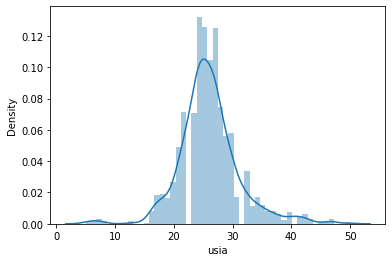

time: 295 ms (started: 2021-11-04 10:34:09 +00:00)


In [ ]:
#Distribusi Usia
sns.distplot(map.usia)

In [ ]:
#y untuk latih
y = np.array(map.usia)

time: 1.59 ms (started: 2021-11-04 10:34:12 +00:00)


In [ ]:
path_train = "/content/train_age/"
filenames = os.listdir(path_train)

time: 7.61 ms (started: 2021-11-04 10:34:14 +00:00)


In [ ]:
#Membuat X latih dari 1983 gambar
train_images=[]
for file in filenames:
    file_path = path_train+file
    image = Image.open(file_path)
    image = image.convert('RGB')
    image = image.resize((224, 224))
    image = np.array(image)
    image = image.astype('float32')
    image /= 255.0
    train_images.append(image)
train_images=np.array(train_images)

time: 8.72 s (started: 2021-11-04 10:34:18 +00:00)


Kami mengubah tahun menjadi bulan karena ingin mendapatkan y yang lebih bervariasi

In [ ]:
y_months = []
for i in y :
  m1 = i*12-6
  m2 = m1 + 11
  y_months.append(randint(m1,m2))

time: 16.8 ms (started: 2021-11-04 10:34:35 +00:00)


### ~~Augmentasi Gambar (Tahapan ini tidak dilakukan saat semifinal, karena beban komputasi akan sangat besar)~~

Augmentasi gambar dilakukan untuk menambah variasi terhadap data latih, yang dilakukan adalah  melakukan rotasi, shift, shear dan zoom serta melakukan horizontal flip. Contoh augmentasinya adalah sebagaimana berikut :

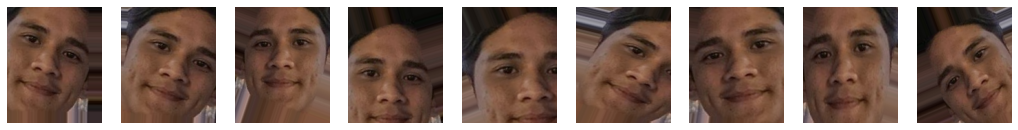

time: 726 ms (started: 2021-10-31 12:06:48 +00:00)


In [ ]:
datagen =  ImageDataGenerator(
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show

def plot(data_generator):
    """
    Plots 9 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=9, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()
    
image = imread("/content/Training_Fix_gender/1/100_1.jpg")

# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

plot(datagen)

## 2.2. Data tes

Berikut adalah alur dari praproses gambar pada data tes :

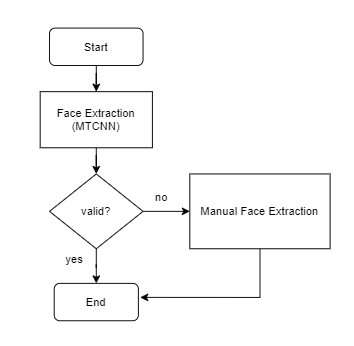

Pertama, kita akan mengurutkan data tes dan mengubah nama gambar menjadi indeks, setelah urut, kita melakukan ekstraksi wajah menggunakan MTCNN, apabila wajah salah terdeteksi atau gambar terdiri dari 2 wajah, maka kita akan mengekstrak wajah yang paling confidence dianggap wajah. 

In [ ]:
#Sorting Testing Folder
root_test = '/content/Testing/'
test=submission
test_image = []
for i in tqdm(range(test.shape[0])):
  file_loc = root_test+str(test['id'][i])+'.jpg'
  img = cv2.imread(file_loc)
  test_image.append(img)
  
X_test=np.array(test_image)

#Save Sorted Test Image
try:
  os.mkdir("/content/Testing_Urut/")
except:
  q=1
path = '/content/Testing_Urut/'
for i in tqdm(range(X_test.shape[0])):
  cv2.imwrite(path+str(i)+".jpg", X_test[i])

File dari hasil pengurutan tersebut dapat dilihat pada (https://drive.google.com/drive/folders/1Nmt7shbLBbGf0cCSxAg7l050GUprPB_Y?usp=sharing). 

Setelah itu kita melakukan ekstraksi wajah menggunakan MTCNN, jika tidak bisa kita menggunakan library deepFace dengan beckendnya adalah MTCNN juga kemudian menyimpannya pada folder Test_Cropped_x. 

Berikut adalah kodenya :

In [ ]:
try:
  os.mkdir("/content/Test_Cropped_x/")
except:
  q=1
from tqdm import tqdm
import math
for i in tqdm(range(submission.shape[0])):
  path="/content/Testing_Urut/"+str(i)+".jpg"
  img = cv2.imread(path)
  detector = MTCNN()
  faces = detector.detect_faces(img)
  sum_face = len(faces)
  if sum_face == 0:
    try:
      aligned_face = DeepFace.detectFace(path)
      resized_image = cv2.resize(aligned_face, (224, 224))
      plt.imsave("/content/Test_Cropped_x/"+str(i)+".jpg",resized_image)
    except:
      resized_image = cv2.resize(img, (224, 224))
      resized_image=cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
      plt.imsave("/content/Test_Cropped_x/"+str(i)+"_manual.jpg",resized_image)
  else:
    detector = MTCNN()
    faces = detector.detect_faces(img)

    A=faces[0].get('box');
    x,y,w,h = A
    image = img[y:y+h, x:x+w]

    resized_image = cv2.resize(image, (224, 224))
    resized_img=cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    resized_image=img_to_array(resized_img) 

    plt.imsave("/content/Test_Cropped_x/"+str(i)+".jpg",resized_img)

Hasil dari ekstraksi wajah tersebut dapat dilihat pada (https://drive.google.com/drive/folders/1cdM7v7udwHwPyrgYZuYNKjDXlOFYl0qD?usp=sharing).

*   Terdapat penambahan "_manual.jpg" di nama gambar, hal ini menandakan bahwa gambar tersebut harus diekstrak/dicrop wajahnya secara manual karena pada gambar tersebut wajahnya tidak terdeteksi.

*   Selain wajah tidak terdeteksi, terdapat juga kesalahan ekstraksi wajah seperti data latih, jika terjadi demikian, kita akan melakukan cropping wajah secara manual.

*   Jika terdapat 2 wajah maka kita mengambil wajah yang paling confidence dianggap wajah, namun untuk prediksi, akan dibahas pada pembahasan selanjutnya.

Gambar yang sudah bersih dapat dilihat pada folder (https://drive.google.com/drive/folders/1zLG8Bzz3lIUWygy01hvmLOxSrOwzDD63?usp=sharing)


Tahapan terakhir adalah melakukan alignment terhadap wajah yang sudah diekstrak dan dibersihkan secara manual (yang berada pada folder Testing_Fix)

In [ ]:
#Hasil Akhir
#Tahap 1 Praproses Data Tes
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pmJHZwEIYX0jBW50ZMrBPmKt15SIdwSE' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pmJHZwEIYX0jBW50ZMrBPmKt15SIdwSE" -O Testing_Fix.zip && rm -rf /tmp/cookies.txt

--2021-11-04 10:34:54--  https://docs.google.com/uc?export=download&confirm=&id=1pmJHZwEIYX0jBW50ZMrBPmKt15SIdwSE
Resolving docs.google.com (docs.google.com)... 172.217.15.110, 2607:f8b0:4004:811::200e
Connecting to docs.google.com (docs.google.com)|172.217.15.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-bc-docs.googleusercontent.com/docs/securesc/cu5hj98dqh23d944nu8ackthchg77ij2/crhajotbqlka818ibku15emrm5nhgods/1636022025000/17539190491766931577/05719702325687318703Z/1pmJHZwEIYX0jBW50ZMrBPmKt15SIdwSE?e=download [following]
--2021-11-04 10:34:58--  https://doc-14-bc-docs.googleusercontent.com/docs/securesc/cu5hj98dqh23d944nu8ackthchg77ij2/crhajotbqlka818ibku15emrm5nhgods/1636022025000/17539190491766931577/05719702325687318703Z/1pmJHZwEIYX0jBW50ZMrBPmKt15SIdwSE?e=download
Resolving doc-14-bc-docs.googleusercontent.com (doc-14-bc-docs.googleusercontent.com)... 142.251.45.1, 2607:f8b0:4004:83e::2001
Connecting to doc-14-bc-d

In [ ]:
import zipfile

#Lokasi file zip
file_path = '/content/Testing_Fix.zip'

#Membaca file Zip
unzip = zipfile.ZipFile(file_path, 'r')
unzip.extractall('/content')
unzip.close()

time: 185 ms (started: 2021-11-04 10:35:03 +00:00)


In [ ]:
#Data Tes
from tqdm import tqdm
test_images=[]
for i in tqdm(range(990)):
  try:
    path = "/content/Testing_Fix/"+str(i)+".jpg"
    image=load_img(path, target_size=(224,224))
  except FileNotFoundError:
    path = "/content/Testing_Fix/"+str(i)+".png"
    image=load_img(path, target_size=(224,224))

  image=img_to_array(image) 
  test_images.append(image)
test_images = np.array(test_images)

100%|██████████| 990/990 [00:01<00:00, 788.13it/s]


time: 1.54 s (started: 2021-11-04 10:35:05 +00:00)


## 2.3 Feature Extraction with VGG Face

Deskriptor CNN VGG-Face dihitung menggunakan implementasi CNN kami berdasarkan arsitektur CNN VGG-Very-Deep-16. Model-model ini dapat digunakan untuk tujuan penelitian non-komersial di bawah Lisensi Atribusi Creative Commons.

VGG 16 adalah arsitektur yang digunakan pada imagenet competition pada tahun 2014 dan keluar sebagai pemenang atau arsitektur terbaik pada kompetisi tersebut. VGG 16 memiliki 5 blok konvolusi dan 3 lapisan yang terhubung penuh. Setiap blok terdiri dari 2 atau lebih lapisan Convolutional dan lapisan Max Pool. Input gambar yang dibutuhkan pada model ini adalah berukuran 224 x 224.  Berikut adalah arsitektur dari VGG 16 :

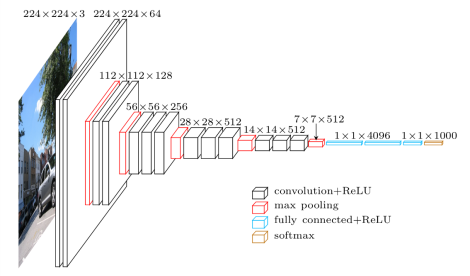

Untuk mengekstraksi gambar, kita hanya memanfaatkan lapisan max pooling terakhir yang berukuran 7x7x512. Kemudian vektor tersebut kita ubah kedalam 1 dimensi, nantinya akan kita gunakan dalam pemodelan atau prediksi menggunakan machine learning (SVM Regressor with Stacking Lasso). 

*VGG Face merupakan pretrained model, menurut peraturan, ini diperbolehkan dalam praproses data, termasuk ekstrasi fitur.*

In [ ]:
#VGG-Face model

from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 128)     7

In [ ]:
#Load Weight VGG Face
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo" -O vgg_face.h5 && rm -rf /tmp/cookies.txt

--2021-11-04 10:35:19--  https://docs.google.com/uc?export=download&confirm=W_OQ&id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
Resolving docs.google.com (docs.google.com)... 172.217.13.238, 2607:f8b0:4004:811::200e
Connecting to docs.google.com (docs.google.com)|172.217.13.238|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-6s-docs.googleusercontent.com/docs/securesc/sv8a7o9aa6vg07717j6jv35h2sphkk5a/9rpbt5hfus0hvb0acp9fl2l4e6k7l4st/1636022100000/02091636547948030128/02507421967152280598Z/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo?e=download [following]
--2021-11-04 10:35:20--  https://doc-00-6s-docs.googleusercontent.com/docs/securesc/sv8a7o9aa6vg07717j6jv35h2sphkk5a/9rpbt5hfus0hvb0acp9fl2l4e6k7l4st/1636022100000/02091636547948030128/02507421967152280598Z/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo?e=download
Resolving doc-00-6s-docs.googleusercontent.com (doc-00-6s-docs.googleusercontent.com)... 142.251.45.1, 2607:f8b0:4004:83e::2001
Connecting to doc-00-

In [ ]:
import  tensorflow

layer_name=[]
for layer in model.layers:
    layer_name.append(layer.name)


model.load_weights('vgg_face.h5')
VGG_model = Model(inputs=model.input, outputs=model.get_layer(str(layer_name[-8])).output)

#Make loaded layers as non-trainable
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0   

In [ ]:
# #Extract Train Data Features
feature_extractor=VGG_model.predict(train_images)
features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_for_training = features #This is our X input to ML

#Extract Test Data Features
X_test_feature = VGG_model.predict(test_images/255)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1) #This is our X input to predict in ML

time: 22min (started: 2021-11-04 10:35:52 +00:00)


In [ ]:
# # Simpan variabel penting

# from google.colab import drive
# drive.mount('/content/drive')

from numpy import asarray
from numpy import savez_compressed

# # save to npy file
# savez_compressed('/content/drive/Shareddrives/BDC SatriaData/Semifinal/X_train.npz', X_for_training)
# # savez_compressed('/content/drive/Shareddrives/BDC SatriaData/Semifinal/y_train_months.npz', y_months)
# # savez_compressed('/content/drive/Shareddrives/BDC SatriaData/Semifinal/X_test.npz', X_test_features)

Mounted at /content/drive
time: 35.5 s (started: 2021-11-04 11:00:21 +00:00)


Kita sudah mempunyai 3 bagian penting untuk prediksi usia menggunakan machine learning yaitu :



*   X_for_training => Hasil ekstrasi dari gambar yang akan dilatih (Berasal dari Training Folder)
*   y_months => Target variabel usia dalam bulan
*   X_test_features => Hasil dari gambar yang akan ditest (Berasal dari testing folder)



# 3. Machine Learning Modelling (SVM + Stacking Lasso)

In [ ]:
#Download variabel untuk Machine Learning Modelling

#X_for_training
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1V8YUjZTGxvMxEpt5NLAKnqIHewOr50UX' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1V8YUjZTGxvMxEpt5NLAKnqIHewOr50UX" -O X_train.npz && rm -rf /tmp/cookies.txt
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('X_train.npz')
# extract the first array
X_for_training = dict_data['arr_0']

#X_test_features
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-4ApgRDR6zlgaKquh6pjDg9ZpNrVSMeG' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-4ApgRDR6zlgaKquh6pjDg9ZpNrVSMeG" -O X_test.npz && rm -rf /tmp/cookies.txt
# load dict of arrays
dict_data = load('X_test.npz')
# extract the first array
X_test_features = dict_data['arr_0']

#y_train
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=10wFjjJxprnQ2qOqqsCLJHHsiSd8qpo0z' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=10wFjjJxprnQ2qOqqsCLJHHsiSd8qpo0z" -O y_months.npz && rm -rf /tmp/cookies.txt
# load dict of arrays
dict_data = load('y_months.npz')
# extract the first array
y_train = dict_data['arr_0']

--2021-11-04 11:02:38--  https://docs.google.com/uc?export=download&confirm=2Iyy&id=1V8YUjZTGxvMxEpt5NLAKnqIHewOr50UX
Resolving docs.google.com (docs.google.com)... 172.217.15.110, 2607:f8b0:4004:811::200e
Connecting to docs.google.com (docs.google.com)|172.217.15.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-3g-docs.googleusercontent.com/docs/securesc/buh0cd1upmtlsg0gt7f19s617cun3ksn/5kcbtd2g4a5e22uaf77atetptqij51qt/1636023750000/17539190491766931577/03025270078972129851Z/1V8YUjZTGxvMxEpt5NLAKnqIHewOr50UX?e=download [following]
--2021-11-04 11:02:39--  https://doc-0g-3g-docs.googleusercontent.com/docs/securesc/buh0cd1upmtlsg0gt7f19s617cun3ksn/5kcbtd2g4a5e22uaf77atetptqij51qt/1636023750000/17539190491766931577/03025270078972129851Z/1V8YUjZTGxvMxEpt5NLAKnqIHewOr50UX?e=download
Resolving doc-0g-3g-docs.googleusercontent.com (doc-0g-3g-docs.googleusercontent.com)... 142.251.45.1, 2607:f8b0:4004:83e::2001
Connecting to doc-0g-

## 3.1. Support Vector Machine Regressor

Support Vector Machine bisa juga digunakan sebagai metode regresi, dengan menampung semua fitur-fitur untuk membentuk algoritmenya (maksimal margin). Support Vector Regression (SVR) menggunakan prinsip yang sama seperti SVM untuk masalah klasifikasi, dengan perbedaan yang tidak terlalu besar di algoritmanya. Dikarenakan outputnya berupa bilangan real maka menjadi semakin sulit untuk memprediksi informasi yang ada, karena mempunyai tak hingga kemungkinan. Pada kasus Regressi, toleransi marginnya (epsilon) diatur pada aproksimasi di SVM yang biasanya sudah diberikan nilainya di permasalahan. 
Ide utamanya adalah : meminimalkan error, mengatur dan menentukan hyperplane untuk memaksimumkan marginnya, dan perlu dicatat juga bahwa pada SVR ini sebagian errornya di toleransi


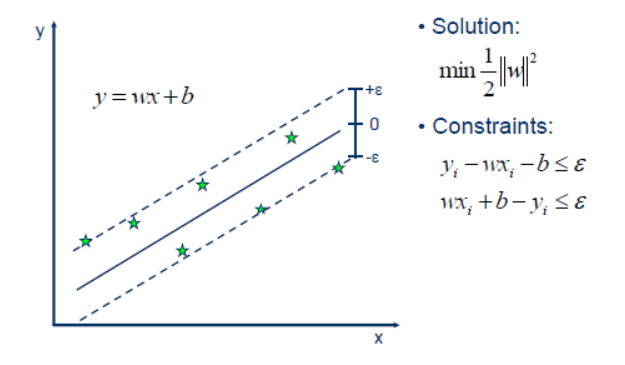

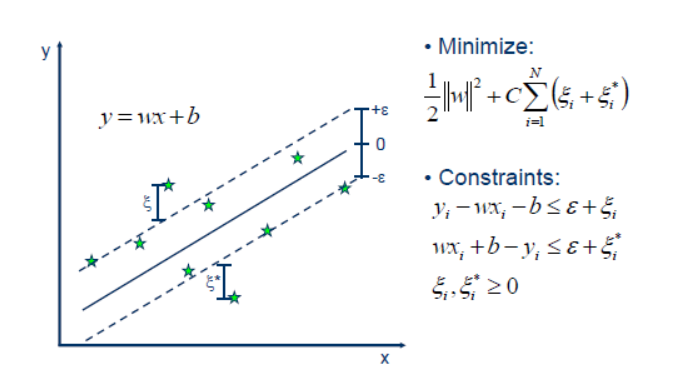

### Non-linear SVR
Fungsi kernel mentransformasi data ke dimensi ruang fitur yang lebih tinggi untuk memungkinkan dilakukannya pemisahan linear.<br>
<center>$y = \sum_{i=1}^{N} (\alpha_i - \alpha_i ^* ).<\psi(x_i),\psi(x)>+b$</center><br>
<center>$y = \sum_{i=1}^{N} (\alpha_i - \alpha_i ^* ).K(x_i,x)+b$</center>

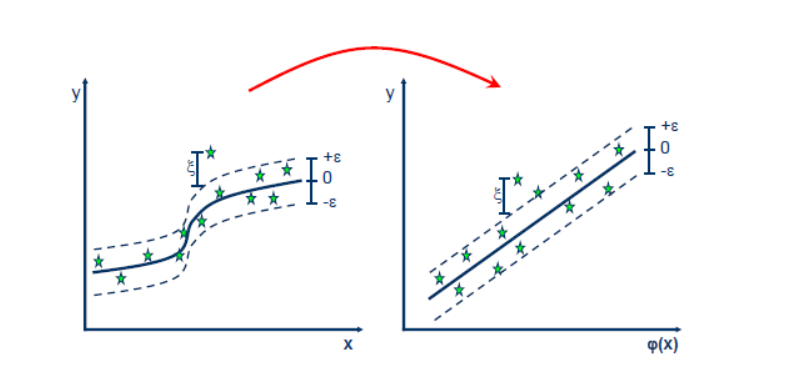

<h4>Gaussian Radial Basis Function</h4>
<center>$k(x_i,x_j)=exp(-\frac{||x_i - x_j||^2}{2\sigma^2})$</center>

### 3.1.1. Hyperparameter tuning

In [ ]:
#Hyperarameter Tuning

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.metrics import make_scorer
#define your own mse and set greater_is_better=False
mse = make_scorer(mean_squared_error,greater_is_better=False)
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVR(), param_grid, scoring=mse,cv = 5, n_jobs = -1, verbose = 1)
 
# fitting the model for grid search
grid.fit(X_for_training, y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Hyperparameter tuning membutuhkan waktu yang lama, berikut adalah hasilnya :

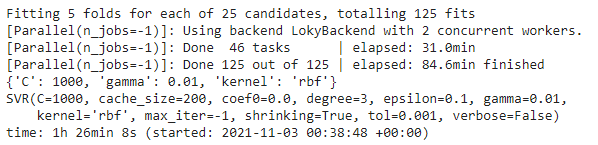

### 3.1.2. Cross-Validation

Setelah itu kita akan melakukan validasi silang 5-folds untuk melihat MSE dalam mengetahui performa yang kita buat. Kita membagi data latih menjadi 80% data latih model dan 20%nya adalah data validasi. Pembagian dilakukan secara acak. Kemudian kita akan mendapatkan error yaitu MSE, MSE tersebut kita rata-ratakan.

Berikut adalah ilustrasinya (pada ilustrasi tidak begitu diacak) :     

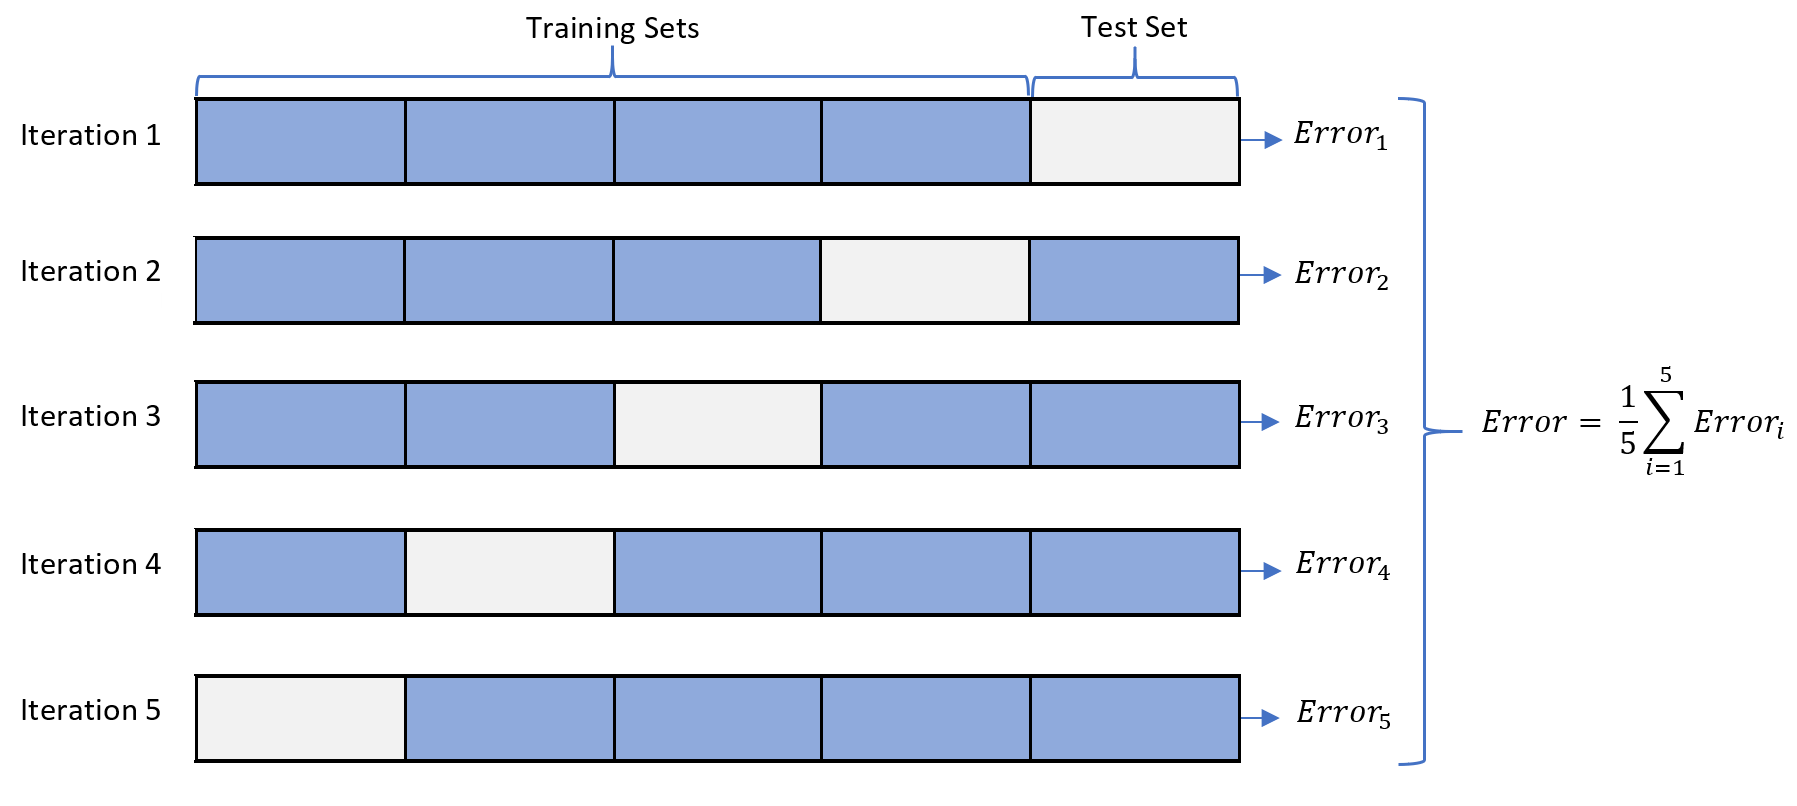

Metriks yang digunakan adalah MSE yaitu rata-rata kuadarat usia aktual dikurang usia prediksi. Perlu diketahui MSE dalam proses ini adalah dalam satuan bulan :

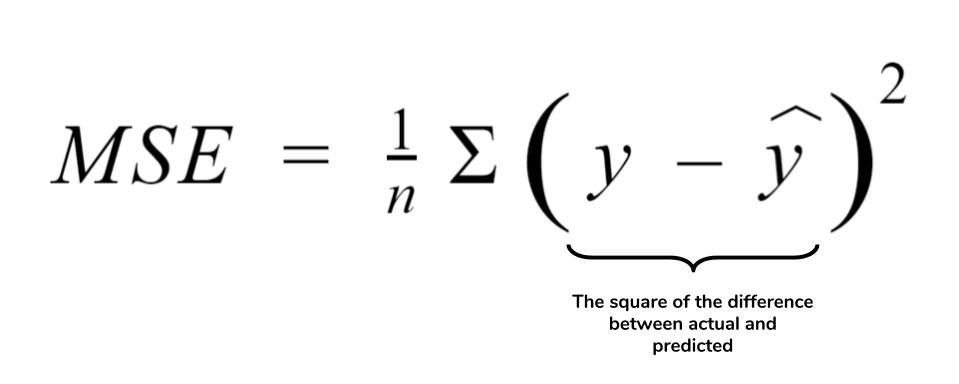




In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=2312, shuffle=True)

scores = cross_val_score(svm, X_for_training, y_train, cv=cv, scoring='neg_mean_squared_error',n_jobs=-1)
print(scores.mean())
print(scores.std())

Validasi silang cukup memakan waktu, pada saat itu hasilnya adalah sebagai berikut :

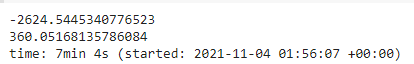


Didapat rata-rata MSE adalah 2624.544 (negatif karena metrics dalam cross_val_score adalah MSE negatif, kita hanya perlu memutlakkannya saja). Dan standar deviasinya 360. (Jika dikonversi ke tahun [dibagi 12^2], **kurang lebih mendapat MSE sebesar 18.226 dengan standar deviasinya adalah 2.500).**

RMSE yang didapat sekitar 4.269, hasil ini bisa dibilang cukup baik dibandingkan dengan library DeepFace untuk umur yang memiliki MAE sebesar 4.65

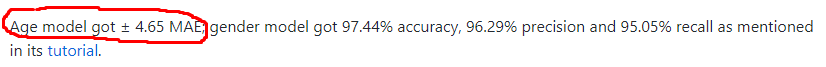

Sumber : https://github.com/serengil/deepface

## 3.2. SVMR with Stacking Lasso

In [ ]:
# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR
from matplotlib import pyplot

### 3.2.1 Lasso Regression

Regresi Lasso merupakan jenis regresi linier yang menggunakan penyusutan. Penyusutan yang dimaksud ketika nilai data menyusut menuju titik pusat, seperti mean. Jenis regresi ini sangat cocok untuk model yang menunjukkan tingkat multikolinearitas yang tinggi atau ketika Anda ingin mengotomatiskan bagian tertentu dari pemilihan model, seperti pemilihan variabel/penghapusan parameter.

In [ ]:
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
lasso = make_pipeline(RobustScaler(),
                      LassoCV(alphas=alphas2,
                              random_state=42, cv=5))

### 3.2.2 StackingRegression

Stacking regression adalah teknik untuk menggabungkan beberapa model regresi melalui meta-regressor. Model regresi individu dilatih berdasarkan set pelatihan yang lengkap kemudian, meta-regressor dipasang berdasarkan output -- meta-features -- dari model regresi individual.

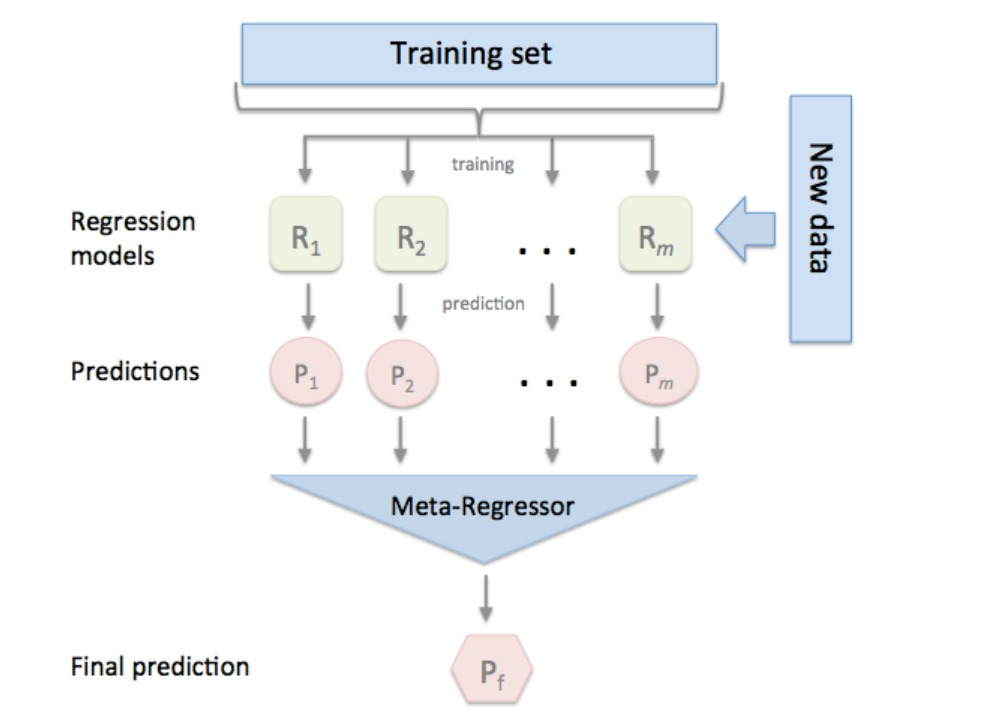

In [ ]:
level0 = list()
level0.append(('svm', SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)))
level1 = lasso

from sklearn.ensemble import StackingRegressor
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=cv)

### 3.2.3 Cross Validation

In [ ]:
def cv_mse(model, X=X_for_training, y=y_train):
    mse = (-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv))
    return (mse)

score = cv_mse(model)
print("Stacking: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

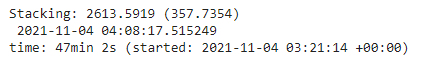

# 4. Predict Testing Folder and Submit

In [ ]:
#Meload model yang sudah ditrain
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1NWFZ4cBNE-iEO10rnm7OWhdVHh87dI-v' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1NWFZ4cBNE-iEO10rnm7OWhdVHh87dI-v" -O model.sav && rm -rf /tmp/cookies.txt

--2021-11-04 10:22:03--  https://docs.google.com/uc?export=download&confirm=xjL2&id=1NWFZ4cBNE-iEO10rnm7OWhdVHh87dI-v
Resolving docs.google.com (docs.google.com)... 142.251.33.206, 2607:f8b0:4004:811::200e
Connecting to docs.google.com (docs.google.com)|142.251.33.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-60-docs.googleusercontent.com/docs/securesc/dpk7u0ag33vucffip33bq2d5gp07t88a/90qbtlfs1id5vugiv0fpcpso3ivghfra/1636021275000/17539190491766931577/01122579658155619298Z/1NWFZ4cBNE-iEO10rnm7OWhdVHh87dI-v?e=download [following]
--2021-11-04 10:22:03--  https://doc-08-60-docs.googleusercontent.com/docs/securesc/dpk7u0ag33vucffip33bq2d5gp07t88a/90qbtlfs1id5vugiv0fpcpso3ivghfra/1636021275000/17539190491766931577/01122579658155619298Z/1NWFZ4cBNE-iEO10rnm7OWhdVHh87dI-v?e=download
Resolving doc-08-60-docs.googleusercontent.com (doc-08-60-docs.googleusercontent.com)... 142.251.45.1, 2607:f8b0:4004:83e::2001
Connecting to doc-08-

In [ ]:
import joblib
# load the model from disk
loaded_model = joblib.load("model.sav")

time: 261 ms (started: 2021-11-04 10:22:12 +00:00)


In [ ]:
pred_test_stack_months = loaded_model.predict(X_test_features) 

time: 1min 22s (started: 2021-11-04 10:26:23 +00:00)


In [ ]:
#Mengubah dari bukan ke tahun
submission["usia"] = np.round(np.array(pred_test_stack_months)/12).astype('int')

time: 4.86 ms (started: 2021-11-04 10:29:16 +00:00)


In [ ]:
import seaborn as sns

#Statistik Deskriptif Usia
submission["usia"].describe()

count    990.000000
mean      26.048485
std        2.802150
min       16.000000
25%       24.000000
50%       26.000000
75%       28.000000
max       34.000000
Name: usia, dtype: float64

time: 21.4 ms (started: 2021-11-04 10:29:19 +00:00)


In [ ]:
submission["usia"].value_counts()

27    148
26    134
24    116
25    113
28    107
29    100
23     77
30     50
21     40
22     32
31     28
20     15
32     11
19      7
33      6
18      2
34      2
17      1
16      1
Name: usia, dtype: int64

time: 10.3 ms (started: 2021-11-04 11:11:23 +00:00)


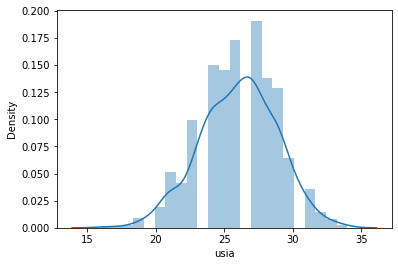

time: 309 ms (started: 2021-11-04 10:29:23 +00:00)


In [ ]:
#Sebaran usia pada data tes
sns.distplot(submission["usia"])

In [ ]:
#Sumbmit
submission.to_csv("submission.csv",index=False)

time: 10.5 ms (started: 2021-11-04 10:29:34 +00:00)


#5. Mencoba Memprediksi Sembarang Foto dari data tes

In [ ]:
#Load Folder Testing Urut
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XF_rzsOgp6jtSV1T0d6bD4Am1U9MIOvS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XF_rzsOgp6jtSV1T0d6bD4Am1U9MIOvS" -O Testing_Urut.zip && rm -rf /tmp/cookies.txt

--2021-11-04 10:29:59--  https://docs.google.com/uc?export=download&confirm=Ae1z&id=1XF_rzsOgp6jtSV1T0d6bD4Am1U9MIOvS
Resolving docs.google.com (docs.google.com)... 172.217.0.46, 2607:f8b0:4004:811::200e
Connecting to docs.google.com (docs.google.com)|172.217.0.46|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-2k-docs.googleusercontent.com/docs/securesc/vsinlifucjjoeqa3j5e3ds4bu4n455dn/3md3pmcu3snri54kr698pht4fad5slmi/1636021725000/17539190491766931577/14736310394126797957Z/1XF_rzsOgp6jtSV1T0d6bD4Am1U9MIOvS?e=download [following]
--2021-11-04 10:29:59--  https://doc-00-2k-docs.googleusercontent.com/docs/securesc/vsinlifucjjoeqa3j5e3ds4bu4n455dn/3md3pmcu3snri54kr698pht4fad5slmi/1636021725000/17539190491766931577/14736310394126797957Z/1XF_rzsOgp6jtSV1T0d6bD4Am1U9MIOvS?e=download
Resolving doc-00-2k-docs.googleusercontent.com (doc-00-2k-docs.googleusercontent.com)... 142.251.45.1, 2607:f8b0:4004:83e::2001
Connecting to doc-00-2k-d

In [ ]:
import zipfile

#Lokasi file zip
file_path = '/content/Testing_Urut.zip'

#Membaca file Zip
unzip = zipfile.ZipFile(file_path, 'r')
unzip.extractall('/content')
unzip.close()

time: 1.37 s (started: 2021-11-04 10:30:07 +00:00)


Prediksi Usianya adalah 24 tahun


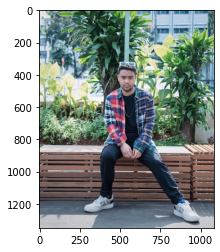

time: 423 ms (started: 2021-11-04 11:16:28 +00:00)


In [ ]:
#index 0-989
i=76
img = plt.imread("/content/Testing_Urut/"+str(i)+".jpg")
plt.imshow(img)
print("Prediksi Usianya adalah "+str(submission.usia[i])+" tahun")